<br>

# Heap Sort

## Introduction


I am writing this notebook to have an in depth look into the inner workings of the Heap sort sorting algorithm. 

## Data Structures and Algorithms


To understand what heap sort algorithm is, we must know what an algorithm is within computer science. On wikipedia an algorithm is described as ["a finite sequence of well-defined instructions, typically used to solve a class of specific problems or to perform a computation."](https://en.wikipedia.org/wiki/Algorithm) [1]

Meaning algorithms give you the implementation to solve a particular problem. In this context, algorithms are used to define data structures and their operations. 

Data structures are a ["management, and storage format that enables efficient access and modification"](https://en.wikipedia.org/wiki/Data_structure)[2] according to wikipedia.

So putting these two together, algorithms determine the way data is organised from these data structures.

Heap sort is one of many sorting algorithms, it is one of most known due to it's performance being that it's best and worst case scenario can be both [O(n\log n)](https://en.wikipedia.org/wiki/Heapsort)[3].


## Heap

To understand heapsort, you must understand heap first.

Heaps are <b>binary trees</b> with nodes that can have at most two children and which must satisfy two properties.

<b>(1)</b>The first being a structual property. In this the tree must satisfy by being <b>complete</b>.It is considered complete when "A heap with height H is a complete binary tree if all the levels have the maximal number of nodes possible, and the remaining nodes at level H reside in the leftmost possible positions at that level."[[4]](https://books.google.ie/books?id=UqmYAgAAQBAJ&printsec=frontcover&dq=data+structures+and+algorithms&hl=en&sa=X&ved=2ahUKEwjT0pD3yM72AhVGasAKHYUfAMUQ6AF6BAgGEAI#v=onepage&q=data%20structures%20and%20algorithms&f=false) 


<b>(2)</b>The second being heap-order property. Which is described as:<br>
The parent node is less than or equal to a child node = <b>min heap.</b><br>
The parent node is greater than or equal to a child node = <b>max heap.</b> [[9]](https://www.geeksforgeeks.org/difference-between-min-heap-and-max-heap/)

This means the root node of the tree is either the largest or smallest element that is in the data structure. With heap sort algorithm it uses a <b>Max Heap.</b> [[4]](https://books.google.ie/books?id=UqmYAgAAQBAJ&printsec=frontcover&dq=data+structures+and+algorithms&hl=en&sa=X&ved=2ahUKEwjT0pD3yM72AhVGasAKHYUfAMUQ6AF6BAgGEAI#v=onepage&q=data%20structures%20and%20algorithms&f=false)





##### Complete binary tree (1)

In a complete binary tree, every level has to be filled with nodes, except the lowest level of the tree. 

However, it is vital to note that any nodes at the lowest level of the tree must lean to the left in order to be a complete binary tree as shown in the diagram below. 

Without any gaps between nodes, the tree will be balanced and therefore, allow heap to be represented efficiently in an array. [Complete binary tree [7]](https://www.baeldung.com/cs/heap-vs-binary-search-tree)

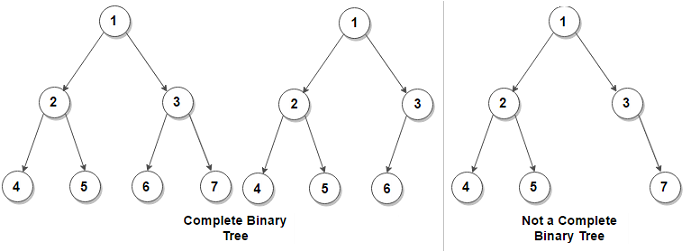

##### Max & Min heap (2)

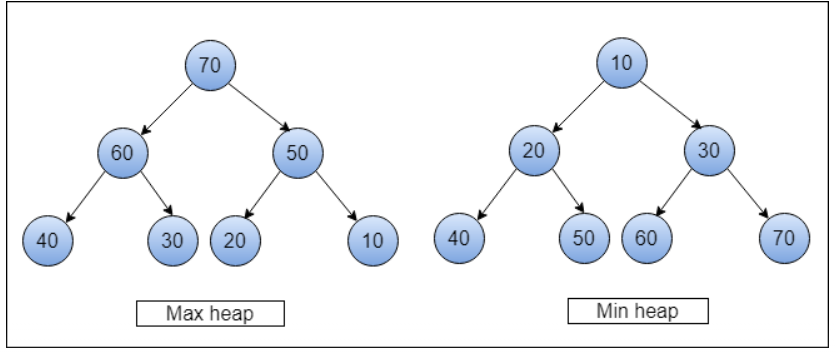

In this complete binary tree diagram [[5]](https://medium.com/@mopurisreenath/what-is-binary-heap-25cd0f8bed24).

On the left side of the diagram, the root or parent node must be greater or equal to the value of its child nodes while the root has the largest number, this heap is known as Max-Heap. 

On the right side of the diagram, the root or parent node must be less or equal to the value of its child nodes while the root has the smallest number, this heap is known as Min-Heap.[[9]](https://www.geeksforgeeks.org/difference-between-min-heap-and-max-heap/)

##### Finding parent and child nodes in Heap

As shown above, heap is a complete binary tree, hence, below will show how to find the location of a parent node and children nodes of a heap.

Left child of a node (i) will be at (2 x i) + 1 and the right child of a node (i) will be at position (2 x i) +2 <br>
The parent of a node will be at position at floor((i - 1) ÷ 2)

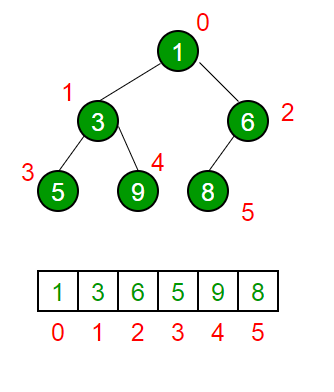

Index number are coloured in <b>RED</b> and the int value within are coloured <b>WHITE</b>.

In the diagram, above the node with the value 3 inside has the index of 1. i= 1

Find children:
<b>Left Child</b>of index 1: (2xi)+1 = (2x1)+1= 3 index. <br>
<b>Right Child</b> of index 1: (2xi)+2 = (2x1)+2 = 4 index.


This shows that index 3 with the value 5 is the left child of index 1. <br>
Index 4 with value 9 is the right child to index 1. <br>

To find the parent of index 3 and 4:


Parent of index 3: floor((i-1)÷2) = floor((3-1)÷2) = floor(1) = index 1.<br>


Parent of index 4: floor((i-1)÷2) = floor((4-1)÷2) = floor(1.5) = index 1.

This shows that index 3 & 4 parent is index 1.

[Reference [10]](https://www.geeksforgeeks.org/binary-heap/)


## Binary Tree




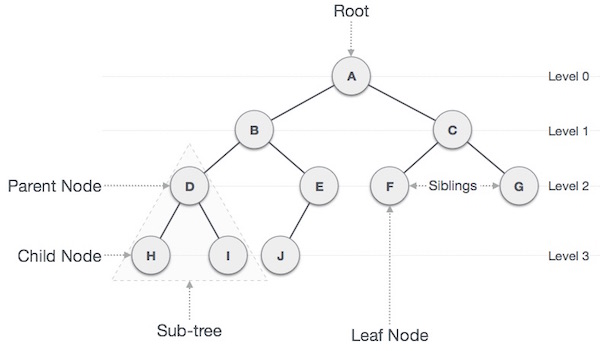

[-Diagram [8]](https://www.tutorialspoint.com/data_structures_algorithms/tree_data_structure.htm)

With heap being an ordered tree based structure, it is usually implemented using a binary tree. 

A binary tree is a tree-type non-linear data structure which consists of nodes that linked by edges. Each node can only have at most two children. Every node in a binary tree has a left and right reference along with the data element. The node at the top of the hierarchy of a tree is called the root node. The nodes that hold other sub-nodes are the parent nodes.

types of nodes:
- Root Node: the one located at the top of the tree.
- child node: A sub-node that is connected by an edge from a parent node.
- parent node:  Any nodes (excluding the root) that has at least one child node (sub-node).
- leaf node: Descendants of a parent node. 

[Reference [8]](https://www.tutorialspoint.com/data_structures_algorithms/tree_data_structure.htm)


##### Implementation of a Binary Tree

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


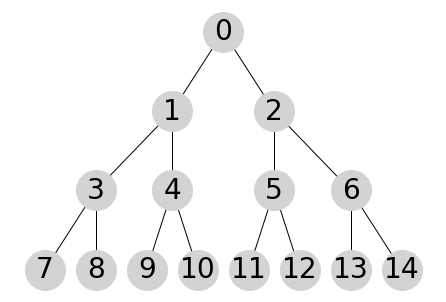

In [2]:
# Importing matplotlib, for plotting.
import matplotlib.pyplot as plt

# Importing networkx to draw graphs.
import networkx as nx

# Importing for math functions.
import math

def drawtree(lengthOfList, highlight=None):
    
  # Creates the binary tree.
  T = nx.balanced_tree(2, math.floor(math.log(len(lengthOfList), 2)))
    
  # Removes nodes greater than the length of L.
  T.remove_nodes_from(list(T.nodes)[len(lengthOfList):])
    
  # Relabel the nodes with elements of L.
  T = nx.relabel_nodes(T, dict(zip(T.nodes, lengthOfList)), copy=True)
    
  # draws positions for the nodes in the picture.
  pos = nx.drawing.nx_pydot.graphviz_layout(T, prog="dot")
    
  # Draws the graph and what it looks like
  nx.draw(T, pos, with_labels=True, node_color='lightgrey', node_size=1600, font_size=28)
    
  # Highlight nodes with colour blue if specify a node for the highlight argument
  if highlight:
    nx.draw_networkx(T.subgraph([i for i in T.nodes if i in highlight]), pos=pos, node_color='lightblue', node_size=1600, font_size=32)

# Length of the list
lengthOfList = 15

# Create a list of length .
L = list(range(lengthOfList))

# Show the list.
print(L)

# Draw the tree from L.
drawtree(L)

In [5]:
def heapify(a,count):
    start = (count - 2)  //2 #   iParent(count-1) // divides by 2 but if num comes out 1.5 // floors it to 1.5
    
    while start >= 0:
        siftDown(a,start,count-1)
        start = start -1



In [44]:
def siftDown(a,start,end):
    root =start
    
    while (2 * root +1)<= end:
        child = (2 * root + 1)
        swap = root
        
        if a[swap] < a[child]:
            swap =child
        if child + 1 <= end and a[swap] < a[child+1]:
            swap = child+1
        if swap == root:
            return
        else:
            a[root], a[swap] = a[swap], a[root]
            root = swap

In [45]:
def heapsort(a):
    """Sorts the unordered array a of length count."""
    count = len(a) # length of the array a
    
    
    heapify(a,count)
    end = count-1
    
    while end > 0:
        a[0], a[end] = a[end], a[0]
        end = end -1
        siftDown(a,0,end)

In [46]:
List = [5,1,3,7,8,9]
List


[5, 1, 3, 7, 8, 9]

In [47]:
heapsort(List)
List

[1, 3, 5, 7, 8, 9]

In [48]:
import itertools
# premutation means gives any order the number can be in a list order, this a list of 0-4
for perm in itertools.permutations(range(5)):
    List = list(perm)
    heapsort(List)
    print(f'{perm} -> {List}')
    
    # sorts every possible premutatioon of the list into order
    

(0, 1, 2, 3, 4) -> [0, 1, 2, 3, 4]
(0, 1, 2, 4, 3) -> [0, 1, 2, 3, 4]
(0, 1, 3, 2, 4) -> [0, 1, 2, 3, 4]
(0, 1, 3, 4, 2) -> [0, 1, 2, 3, 4]
(0, 1, 4, 2, 3) -> [0, 1, 2, 3, 4]
(0, 1, 4, 3, 2) -> [0, 1, 2, 3, 4]
(0, 2, 1, 3, 4) -> [0, 1, 2, 3, 4]
(0, 2, 1, 4, 3) -> [0, 1, 2, 3, 4]
(0, 2, 3, 1, 4) -> [0, 1, 2, 3, 4]
(0, 2, 3, 4, 1) -> [0, 1, 2, 3, 4]
(0, 2, 4, 1, 3) -> [0, 1, 2, 3, 4]
(0, 2, 4, 3, 1) -> [0, 1, 2, 3, 4]
(0, 3, 1, 2, 4) -> [0, 1, 2, 3, 4]
(0, 3, 1, 4, 2) -> [0, 1, 2, 3, 4]
(0, 3, 2, 1, 4) -> [0, 1, 2, 3, 4]
(0, 3, 2, 4, 1) -> [0, 1, 2, 3, 4]
(0, 3, 4, 1, 2) -> [0, 1, 2, 3, 4]
(0, 3, 4, 2, 1) -> [0, 1, 2, 3, 4]
(0, 4, 1, 2, 3) -> [0, 1, 2, 3, 4]
(0, 4, 1, 3, 2) -> [0, 1, 2, 3, 4]
(0, 4, 2, 1, 3) -> [0, 1, 2, 3, 4]
(0, 4, 2, 3, 1) -> [0, 1, 2, 3, 4]
(0, 4, 3, 1, 2) -> [0, 1, 2, 3, 4]
(0, 4, 3, 2, 1) -> [0, 1, 2, 3, 4]
(1, 0, 2, 3, 4) -> [0, 1, 2, 3, 4]
(1, 0, 2, 4, 3) -> [0, 1, 2, 3, 4]
(1, 0, 3, 2, 4) -> [0, 1, 2, 3, 4]
(1, 0, 3, 4, 2) -> [0, 1, 2, 3, 4]
(1, 0, 4, 2, 3) -> [

<br>

## Teachers version of heap sort 

In [50]:
def siftDown(L, parent, end):
    """L[parent:end+1] should almost be a max heap.
       siftDown repairs it so that it is one."""
    
    # Keep track of the number of comparisons.
    no_comparisons = 0
    
    # While parent is actually a parent (has at least a left child).
    while 2*parent + 1 <= end:
        # The indices of the children of parent.
        lchild = 2 * parent + 1
        rchild = 2 * parent + 2
        
        # Assume the parent is larger than the children.
        swap = parent
        # Is the parent smaller than the left child?
        if L[swap] < L[lchild]:
            # Then swap is set to index of left child.
            swap = lchild
            # Increment no_comparisons.
            no_comparisons = no_comparisons + 1
        # Check if right child exists and is smaller than L[swap].
        if rchild <= end and L[swap] < L[rchild]:
            # Then swap is set to index of right child.
            swap = rchild
            # Increment no_comparisons.
            no_comparisons = no_comparisons + 1
        # We have a max heap if the parent is bigger than the children.
        if swap == parent:
            break 
        else:
            # Swap the parent with the bigger child.
            L[parent], L[swap] = L[swap], L[parent]
            # Set parent to bigger child's index.
            parent = swap
    
    # Return the number of comparisons.
    return no_comparisons


In [51]:
def heapsort(L):
    """Sorts the list L in-place using Heap Sort."""
    
    #section 1
    
    # Keep track of the number of comparisons.
    no_comparisons = 0
    
    # Turn L into a max heap which is when everyparent is bigger than their child thats what this section does
    # Index of the last element. the last child in the graph to find the parent
    last_element = len(L) - 1
    # Find the last parent. by using this math which finds the parent of the last child
    last_parent = (last_element - 1) // 2
    # Loop backwards through all parents. -1 goes backwards
    for parent in range(last_parent, -1, -1):
        # Sift down.
        no_comparisons = no_comparisons + siftDown(L, parent, last_element)

    
    #section 2
    
    # Segregate the list L into two parts:
    #   1. L[:end] is a max heap
    #   2. Each element beyond end is greater than everything before it.
    # While there are still elements in the heap.
    for end in range(last_element, 0, -1):
        # Swap the element at index 0 with the element at index end.
        L[0], L[end] = L[end], L[0]
        # Fix the heap - the root is currently out of place.
        no_comparisons = no_comparisons + siftDown(L, 0, end - 1)
    
    # Return the number of comparisons.
    return no_comparisons

In [52]:
# The example list from the diagram above.
L = [19, 100, 36, 25, 3, 17, 7, 1, 2]
L


[19, 100, 36, 25, 3, 17, 7, 1, 2]

In [53]:
# Show heap sort working.
heapsort(L)
L

[1, 2, 3, 7, 17, 19, 25, 36, 100]

<br>

## Comparing Algorithms

In [54]:
# Perform heap sort, show number of comparisons.
L = [19, 100, 36, 25, 3, 17, 7, 1, 2]
no_comparisons = heapsort(L)
L, no_comparisons

([1, 2, 3, 7, 17, 19, 25, 36, 100], 12)

In [55]:
# Perform bubble sort, show number of comparisons.
L = [19, 100, 36, 25, 3, 17, 7, 1, 2]
no_comparisons = bubble_sort(L)
L, no_comparisons

([1, 2, 3, 7, 17, 19, 25, 36, 100], 36)

In [56]:
# A module full of combinatorial functions.
import itertools

# Length of example list.
n = 5

# Loop through all permutations of the list of integers from 0 to n.
for perm in itertools.permutations(range(n)):
    L = list(perm)
    bubb_comp = bubble_sort(L)
    L = list(perm)
    heap_comp = heapsort(L)
    print(f'{str(perm)[1:-1]}| bubSort = {bubb_comp}| HeapSort= {heap_comp}')
    
    # how many comparsions each sort did for tons of 0-5 orders to sort them out

0, 1, 2, 3, 4| bubSort = 4| HeapSort= 8
0, 1, 2, 4, 3| bubSort = 7| HeapSort= 9
0, 1, 3, 2, 4| bubSort = 7| HeapSort= 7
0, 1, 3, 4, 2| bubSort = 9| HeapSort= 8
0, 1, 4, 2, 3| bubSort = 7| HeapSort= 8
0, 1, 4, 3, 2| bubSort = 9| HeapSort= 6
0, 2, 1, 3, 4| bubSort = 7| HeapSort= 6
0, 2, 1, 4, 3| bubSort = 7| HeapSort= 7
0, 2, 3, 1, 4| bubSort = 9| HeapSort= 8
0, 2, 3, 4, 1| bubSort = 10| HeapSort= 6
0, 2, 4, 1, 3| bubSort = 9| HeapSort= 6
0, 2, 4, 3, 1| bubSort = 10| HeapSort= 7
0, 3, 1, 2, 4| bubSort = 7| HeapSort= 7
0, 3, 1, 4, 2| bubSort = 9| HeapSort= 5
0, 3, 2, 1, 4| bubSort = 9| HeapSort= 9
0, 3, 2, 4, 1| bubSort = 10| HeapSort= 7
0, 3, 4, 1, 2| bubSort = 9| HeapSort= 5
0, 3, 4, 2, 1| bubSort = 10| HeapSort= 6
0, 4, 1, 2, 3| bubSort = 7| HeapSort= 6
0, 4, 1, 3, 2| bubSort = 9| HeapSort= 4
0, 4, 2, 1, 3| bubSort = 9| HeapSort= 8
0, 4, 2, 3, 1| bubSort = 10| HeapSort= 6
0, 4, 3, 1, 2| bubSort = 9| HeapSort= 7
0, 4, 3, 2, 1| bubSort = 10| HeapSort= 5
1, 0, 2, 3, 4| bubSort = 7| HeapSo

<br>
# extra: pandas like excel

In [57]:
# Like Excel for Python
import pandas as pd

In [58]:
# Length of example list.
n = 9

results = [[str(perm)[1:-1], bubble_sort(list(perm)), heapsort(list(perm))] for perm in itertools.permutations(range(n))]

In [59]:
# Peak at the results.
#results

In [60]:
df = pd.DataFrame(results, columns=['list', 'bubble', 'heap'])

In [61]:
df.head()

,list,bubble,heap
0,"0, 1, 2, 3, 4, 5, 6, 7, 8",8,25
1,"0, 1, 2, 3, 4, 5, 6, 8, 7",15,23
2,"0, 1, 2, 3, 4, 5, 7, 6, 8",15,24
3,"0, 1, 2, 3, 4, 5, 7, 8, 6",21,24
4,"0, 1, 2, 3, 4, 5, 8, 6, 7",15,22


In [62]:
df.describe()

,bubble,heap
count,362880.000000,362880.000000
mean,33.506842,18.522917
std,3.077026,2.399822
min,8.000000,9.000000
25%,33.000000,17.000000
50%,35.000000,19.000000
75%,36.000000,20.000000
max,36.000000,27.000000


   # References

https://en.wikipedia.org/wiki/Algorithm [1] <br>
https://en.wikipedia.org/wiki/Data_structure [2]<br>
https://en.wikipedia.org/wiki/Heapsort [3]<br>


Data Structures and Algorithms in Java by Michael T. Goodrich
https://books.google.ie/books?id=UqmYAgAAQBAJ&printsec=frontcover&dq=data+structures+and+algorithms&hl=en&sa=X&ved=2ahUKEwjT0pD3yM72AhVGasAKHYUfAMUQ6AF6BAgGEAI#v=onepage&q=data%20structures%20and%20algorithms&f=false  [4]<br>

What is a binary heap 
https://medium.com/@mopurisreenath/what-is-binary-heap-25cd0f8bed24 [5]<br>

complete binary tree
https://www.techiedelight.com/check-given-binary-tree-complete-binary-tree-not/ [6] <br>

https://www.baeldung.com/cs/heap-vs-binary-search-tree [7] <br>

binary tree data structure and algorithms https://www.tutorialspoint.com/data_structures_algorithms/tree_data_structure.htm [8] <br>

max and min heap https://www.geeksforgeeks.org/difference-between-min-heap-and-max-heap/ [9] <br>

binary heap geeks https://www.geeksforgeeks.org/binary-heap/ [10] <br>